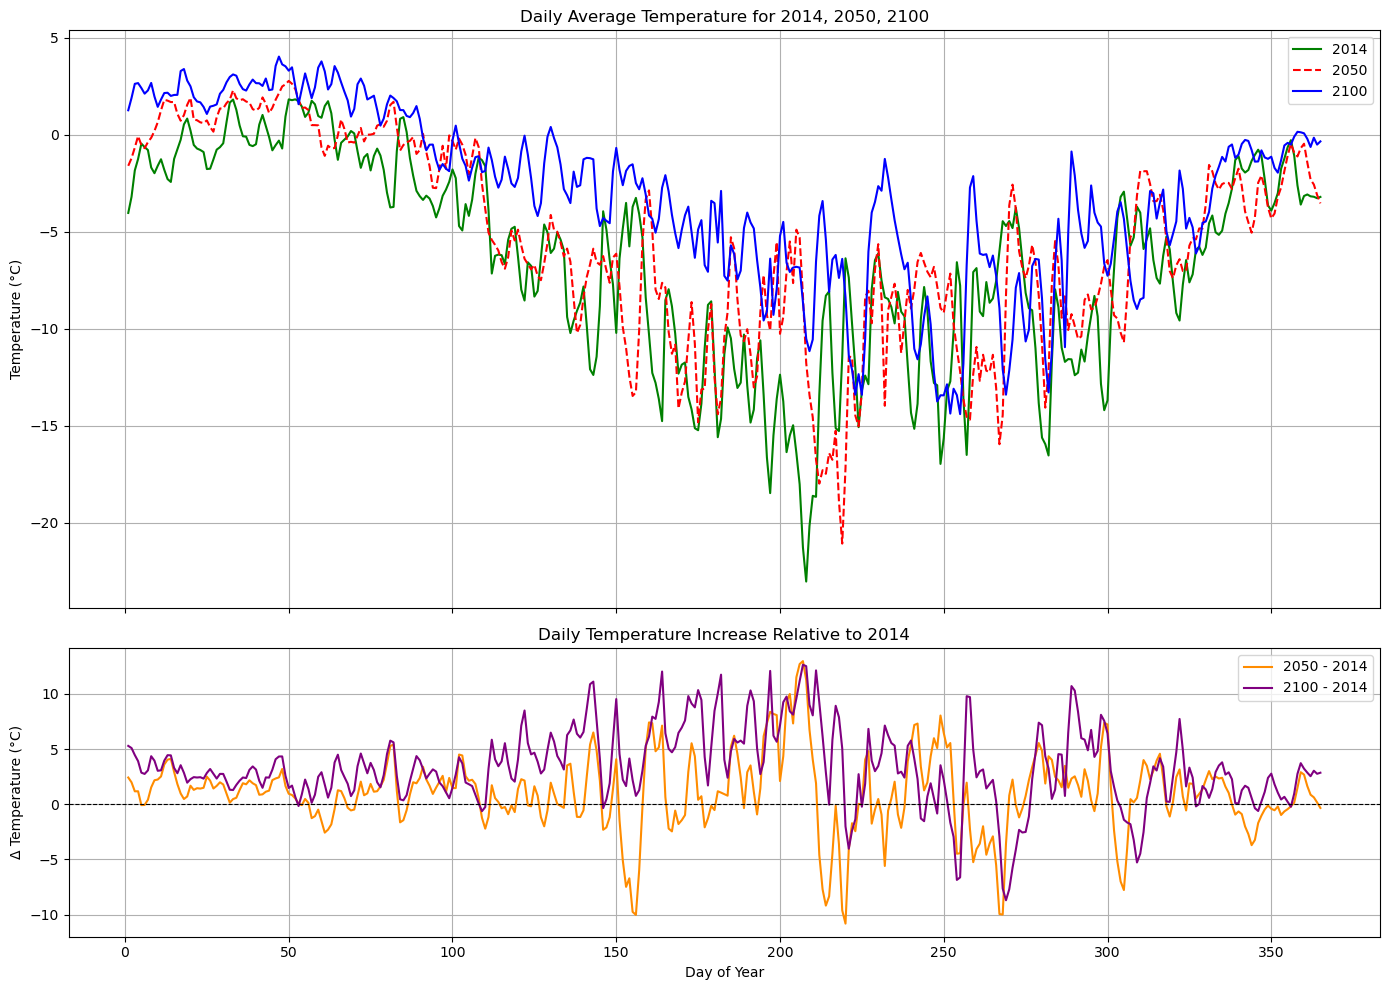

2050 - 2014 warming: Max = 12.98 °C, Min = -10.81 °C
2100 - 2014 warming: Max = 12.65 °C, Min = -8.69 °C


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Load the CMIP6 files
file_path1 = 'tas_day_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_21000101-21001231.nc'  # 2100 data
file_path2 = 'tas_day_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_20500101-20501231.nc'  # 2050 data
file_path3 = 'tas_day_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_20140101-20141231.nc'  # 2014 data
data1 = xr.open_dataset(file_path1)
data2 = xr.open_dataset(file_path2)
data3 = xr.open_dataset(file_path3)

# Convert to Celsius
tas1_C = data1['tas'] - 273.15
tas2_C = data2['tas'] - 273.15
tas3_C = data3['tas'] - 273.15

# Slice the full year
tas1_C = tas1_C.sel(time=slice('2100-01-01', '2100-12-31'))
tas2_C = tas2_C.sel(time=slice('2050-01-01', '2050-12-31'))
tas3_C = tas3_C.sel(time=slice('2014-01-01', '2014-12-31'))

# Average over lat and lon
daily_2100 = tas1_C.mean(dim=['lat', 'lon'])
daily_2050 = tas2_C.mean(dim=['lat', 'lon'])
daily_2014 = tas3_C.mean(dim=['lat', 'lon'])

# Add day-of-year
daily_2100['doy'] = daily_2100['time'].dt.dayofyear
daily_2050['doy'] = daily_2050['time'].dt.dayofyear
daily_2014['doy'] = daily_2014['time'].dt.dayofyear

# Align time series on day-of-year
df_2100 = daily_2100.to_dataframe(name='tas_2100').set_index('doy')
df_2050 = daily_2050.to_dataframe(name='tas_2050').set_index('doy')
df_2014 = daily_2014.to_dataframe(name='tas_2014').set_index('doy')

# Combine into single dataframe
df = pd.concat([df_2014, df_2050, df_2100], axis=1)

# Compute warming
df['delta_2050_2014'] = df['tas_2050'] - df['tas_2014']
df['delta_2100_2014'] = df['tas_2100'] - df['tas_2014']

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# --- Plot 1: Daily mean tas ---
axs[0].plot(df.index, df['tas_2014'], label='2014', color='green')
axs[0].plot(df.index, df['tas_2050'], label='2050', color='red', linestyle='--')
axs[0].plot(df.index, df['tas_2100'], label='2100', color='blue')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_title('Daily Average Temperature for 2014, 2050, 2100')
axs[0].grid(True)
axs[0].legend()

# --- Plot 2: Warming difference ---
axs[1].plot(df.index, df['delta_2050_2014'], label='2050 - 2014', color='darkorange')
axs[1].plot(df.index, df['delta_2100_2014'], label='2100 - 2014', color='purple')
axs[1].set_ylabel('Δ Temperature (°C)')
axs[1].set_xlabel('Day of Year')
axs[1].set_title('Daily Temperature Increase Relative to 2014')
axs[1].axhline(0, color='black', linewidth=0.8, linestyle='--')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# Print max and min warming values
max_delta_2050 = df['delta_2050_2014'].max()
min_delta_2050 = df['delta_2050_2014'].min()
max_delta_2100 = df['delta_2100_2014'].max()
min_delta_2100 = df['delta_2100_2014'].min()

print(f"2050 - 2014 warming: Max = {max_delta_2050:.2f} °C, Min = {min_delta_2050:.2f} °C")
print(f"2100 - 2014 warming: Max = {max_delta_2100:.2f} °C, Min = {min_delta_2100:.2f} °C")

In [2]:
# Calculate the average temperature for each period
avg_temp_2100 = daily_2100.mean().item()
avg_temp_2050 = daily_2050.mean().item()
avg_temp_2014 = daily_2014.mean().item()

# Calculate the temperature increases
temp_increase_2014_to_2050 = avg_temp_2050 - avg_temp_2014
temp_increase_2050_to_2100 = avg_temp_2100 - avg_temp_2050
temp_increase_2014_to_2100 = avg_temp_2100 - avg_temp_2014

# Print the results
print(f'Average temperature in 2014: {avg_temp_2014:.2f} °C')
print(f'Average temperature in 2050: {avg_temp_2050:.2f} °C')
print(f'Average temperature in 2100: {avg_temp_2100:.2f} °C')
print(f'Average temperature increase from 2014 to 2050: {temp_increase_2014_to_2050:.2f} °C')
print(f'Average temperature increase from 2014 to 2100: {temp_increase_2014_to_2100:.2f} °C')

Average temperature in 2014: -6.42 °C
Average temperature in 2050: -5.41 °C
Average temperature in 2100: -3.05 °C
Average temperature increase from 2014 to 2050: 1.01 °C
Average temperature increase from 2014 to 2100: 3.37 °C


In [7]:
def seasonal_avg(ds, season):
    """Return spatial average of the seasonal mean."""
    if season == 'JJA':
        return ds.sel(time=ds['time.season'] == 'JJA').mean(dim=['time', 'lat', 'lon']).item()
    elif season == 'DJF':
        return ds.sel(time=ds['time.season'] == 'DJF').mean(dim=['time', 'lat', 'lon']).item()
    elif season == 'SON':
        return ds.sel(time=ds['time.season'] == 'SON').mean(dim=['time', 'lat', 'lon']).item()
    elif season == 'MAM':
        return ds.sel(time=ds['time.season'] == 'MAM').mean(dim=['time', 'lat', 'lon']).item()
    else:
        raise ValueError("Season must be 'JJA' or 'DJF' or 'SON' or 'MAM'")

# Seasonal Averages
winter_2014 = seasonal_avg(tas3, 'JJA')
summer_2014 = seasonal_avg(tas3, 'DJF')
spring_2014 = seasonal_avg(tas3, 'SON')
fall_2014 = seasonal_avg(tas3, 'MAM')

winter_2050 = seasonal_avg(tas2, 'JJA')
summer_2050 = seasonal_avg(tas2, 'DJF')
spring_2050 = seasonal_avg(tas2, 'SON')
fall_2050 = seasonal_avg(tas2, 'MAM')

winter_2100 = seasonal_avg(tas1, 'JJA')
summer_2100 = seasonal_avg(tas1, 'DJF')
spring_2100 = seasonal_avg(tas1, 'SON')
fall_2100 = seasonal_avg(tas1, 'MAM')

# Warming Calculations
winter_warming_2014_2050 = winter_2050 - winter_2014
winter_warming_2014_2100 = winter_2100 - winter_2014

summer_warming_2014_2050 = summer_2050 - summer_2014
summer_warming_2014_2100 = summer_2100 - summer_2014

spring_warming_2014_2050 = spring_2050 - spring_2014
spring_warming_2014_2100 = spring_2100 - spring_2014

fall_warming_2014_2050 = fall_2050 - fall_2014
fall_warming_2014_2100 = fall_2100 - fall_2014

# Print results
print(f"Summer Avg Temp 2014: {summer_2014:.2f} °C, 2050: {summer_2050:.2f} °C, 2100: {summer_2100:.2f} °C")
print(f"Winter Avg Temp 2014: {winter_2014:.2f} °C, 2050: {winter_2050:.2f} °C, 2100: {winter_2100:.2f} °C")
print(f"Spring Avg Temp 2014: {spring_2014:.2f} °C, 2050: {spring_2050:.2f} °C, 2100: {spring_2100:.2f} °C")
print(f"Fall Avg Temp 2014: {fall_2014:.2f} °C, 2050: {fall_2050:.2f} °C, 2100: {fall_2100:.2f} °C")
print(f"Winter warming 2014→2050: {winter_warming_2014_2050:.2f} °C, 2014→2100: {winter_warming_2014_2100:.2f} °C")
print(f"Summer warming 2014→2050: {summer_warming_2014_2050:.2f} °C, 2014→2100: {summer_warming_2014_2100:.2f} °C")
print(f"Spring warming 2014→2050: {spring_warming_2014_2050:.2f} °C, 2014→2100: {spring_warming_2014_2100:.2f} °C")
print(f"Fall warming 2014→2050: {fall_warming_2014_2050:.2f} °C, 2014→2100: {fall_warming_2014_2100:.2f} °C")

# Close datasets
data1.close()
data2.close()
data3.close()

Summer Avg Temp 2014: -0.99 °C, 2050: -0.14 °C, 2100: 1.35 °C
Winter Avg Temp 2014: -11.78 °C, 2050: -10.53 °C, 2100: -6.02 °C
Spring Avg Temp 2014: -8.63 °C, 2050: -7.71 °C, 2100: -6.93 °C
Fall Avg Temp 2014: -4.18 °C, 2050: -3.18 °C, 2100: -0.54 °C
Winter warming 2014→2050: 1.25 °C, 2014→2100: 5.76 °C
Summer warming 2014→2050: 0.85 °C, 2014→2100: 2.34 °C
Spring warming 2014→2050: 0.92 °C, 2014→2100: 1.71 °C
Fall warming 2014→2050: 1.00 °C, 2014→2100: 3.63 °C
